Gradient Descent in Linear Regression from scracth

In linear regression, Model targets to get the best fit regression line to predict the values of y based on the given input attribute values. 
When training, model calculates the cost function which measures Root Mean Squared error and targets to minimize the error.

To minimize the cost function the model first randomly selects the weights and bias and iteratively updates these values inorder to minimize the cost function. 

We graph cost function as a function of parameter of estimates. We move towards the pits in the graph to find the min value. Descent step-downs the cost function in the direction of the steepest descent. The size of each step is determined by parameter known as learning rate. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

w - weights of the hypothesis

h(xi) - predicted y value for i input

lr -learning rate of greadient descent 

In [20]:
class Regressor():
    
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False): # parameters needed to implement regression
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) # random initialization of weights and bias
        self.b = 0
    
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m) # sum of squared errors 
        return cost
   
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std) # normalize data (data-mean)/std deviation

    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0) 
            # normalize data (data-mean)/std deviation
            X = (X-self.__mean) / (self.__std)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b  # train model 
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            # optimize 
            h_opt = np.dot(X,self.W)+self.b
            dW_opt = np.dot( X.T, (h_opt-y) ) / self.__m
            db_opt = np.sum( h_opt-y )  / self.__m
            self.W = self.W - self.__lr*dW_opt
            self.b = self.b - self.__lr*db_opt

            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    
    def predict(self,X):
        if self.__normalize: X = (X-self.__mean) / (self.__std)# normalize data (data-mean)/std deviation
        return np.dot(X,self.W)+self.b
    
    def plot(self,figsize=(7,5)):  # plot the data 
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    
    def score(self,X,y): # calculate accuracy of data
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))


data set used is bostan house prices. 

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [13]:

X_train, X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.1)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

X_train:(455, 13)
y_train:(455,)


Train Score: 0.7146949827779092
Test Score:  0.7386961127533329


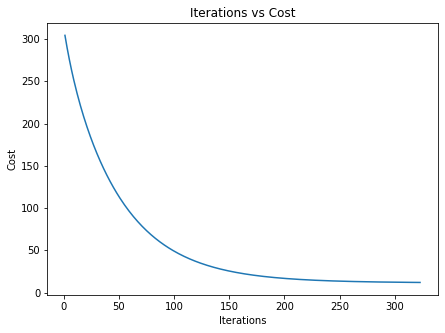

In [21]:


regressor = Regressor(normalize=True)

regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()